# Machine Learning Classification of Protein's RMSD Values
## Nhan D. Nguyen
## CHE-471
## Instructor: Dr. Charles Weiss
### May 1, 2018

## Abstract
In this project, the Root Mean Square Deviation (RMSD) of a protein is predicted, compared to its native state. Researchers used six chemical and physical values of a protein (emperical energy, secondary structure penalty, total surface area, pair number, residue length, and Euclidean distance) to simulate its structure. When the modelled structure and the native one are superimposed, they measured the RMSD between two geometrical structures. Using machine learning, we could predict the RMSD of a protein based on six properties given above. If the RMSD of a protein is $\leq$ 5 Å, the model is considered to be close to the native one. 

This data is taken from http://bit.ly/PSP-ML<sup>1</sup>.

## Introduction

Predicting protein 3D structures without crystalization has been a challenging problem. Chemical, physical, and biological properties are the determinants of protein folding under specific solvent environments. A lot of problems involves in predicting a protein's native structure such as secondary structure arrangment and misfolding tertiary structures because the protein is not folded in solvent conditions. This research helps to determine whether the predicted proteins are structurally similar to the native, folded proteins based on six experimental factors. 
The Root Mean Square Deviation (RMSD) is the squareroot of the sum of all distance's changes between matched pairs of $C_\alpha$ in two superimposed protein sequences.

 ###                                                       <center>$RMSD=\sqrt{\sum_{i=1}^{N}{\dfrac {(p_i-q_i)^2}{N}}}$</center>
 
where $p_i, q_i$ are coordinate positions of matched pairs of $C_\alpha$ in the modelled protein, and its native one, respectively.

###### There are six physical and chemical properties<sup>1</sup> that can be used to predict the RMSD of a protein.

1. Total surface area (Area): the total surface area of a protein that is exposed to the solvent after the protein is fully folded. The surface area of a protein is dependent on the amino acids which ultimately bury the hydrophobic core.

2. Euclidean Distance (ED): $C_\alpha$'s positions were restricted when interacting with neighborhood $C_\alpha$ in a folded protein$^2$. The sum of distance between each pair of $C_\alpha$ in a single protein is computed as ED.

3. Total empirical energy (Energy): The sum of electrostatic force, Vander Waals, and hydrophobic force.

4. Secondary Structure Penalty (SS): it is measured from secondary structure sequence. It is computed as the absolute difference between secondary structures based on coordinates and the probability for the same class structures. 

5. Pair number (PN): the total number of aliphatic, hydrophobic residue pairs in the protein structure.

6. Residue Length (RL): the total number of $C_\beta$ carborns in the structure

The RMSD is computed using Python, instead of using R from the previous research$^1$. The goal is to classify RMSD values into one of five categories, 1, 2, 3, 4, or 5Å. We apply Machine Learning from Sklearn library with support from Pandas, Seaborn, Numpy, and Matplotlib libraries. 4 models are used: Neural Network, Linear Model Classification, K Neighbor Classification, and Randomforest, to analyze the dataset. The model that computes the highest accuracy is optimized using GridSearch to tune specific parameters for that model. Finally, the tuned model is tested with confusion matrix, k fold validation and my own k fold validation. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Method & Result

### I. Dataset
The dataset was extracted from a file named "PSP-Dataset.csv" form http://bit.ly/PSP-ML<sup>1</sup>

In [2]:
data=pd.read_csv('PSP-Dataset.csv')
data.head()

,RMSD,Area,ED,Energy,SS,ResidueLength,PairNumber
0,2.742,4722.92,4019.64,-1596.90,13,79,317
1,1.557,4059.12,2191.03,-1146.08,20,54,165
2,2.362,4773.56,2787.99,-1263.38,46,67,224
3,3.892,8271.27,9545.98,-2848.93,26,138,554
4,4.454,7102.16,14148.80,-2381.15,85,120,809


###### Processing data:
Several RMSD(s) have values of 0 which, from the source, meant the RMSD was not predicted. Therefore, we wanted to get rid of those 0 values in RMSD
Moreover, the raw data have RMSD in 'float', but we wanted them to be 'integers' for classification purposes.  

In [3]:
data.drop(data[data['RMSD'] ==0].index, inplace=True)
data.index=np.arange(len(data))

RMSD=np.around(data['RMSD'],decimals=0)
RMSD=RMSD.astype('int64')
data['RMSD']=RMSD

data.head()

,RMSD,Area,ED,Energy,SS,ResidueLength,PairNumber
0,3,4722.92,4019.64,-1596.90,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


*Dataset was split into train and test sets. According to the paper, 30% of the datasets was assigned to test*

In [4]:
y=data['RMSD']
X=data.drop('RMSD', axis=1)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

## II. Model testing:
###### Linear Model Classification

In [5]:
sgd=SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)

0.07727144070195302

###### K near neighbor classification

In [6]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6422303990942542

###### Neural Network with 3 layers each 100 nodes

In [7]:
mlp= MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000,alpha=0.00001)
mlp.fit(X_train, y_train)
mlp.score(X_test,y_test)

0.3212567223322955

###### Random Forest Classifier: 
This model yielded the highest accuracy for the test dataset. Increasing 'min_samples_split' parameter in RFC also reduced overfitting, but too high 'min_samples_split' (>80) reduced the accuracy of the train set. The RFC model was further tuned with Gridsearch.

In [8]:
rfc=RandomForestClassifier(n_estimators=30, min_samples_split=80)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
rfc.score(X_test,y_test)

0.6614774978771583

In [9]:
rfc.score(X_train,y_train)

0.6940905229947821

### GridSearch

The GridSearch was used to tune the number of features which were used to train the model. This was important to remove some features because they had low importants values, less contributing to model prediction.

In [13]:
%time
param_grid = {"max_features": np.arange(6)+1, "min_impurity_decrease": np.arange(5),"min_weight_fraction_leaf":np.arange(5)/10}
gs=GridSearchCV(rfc,param_grid=param_grid)
gs.fit(X_train, y_train)
gs.best_params_

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.06 µs


{'max_features': 4,
 'min_impurity_decrease': 0,
 'min_weight_fraction_leaf': 0.0}

In [14]:
y_pred=gs.predict(X_test)
gs.score(X_test,y_test)

0.6685536371355788

In [15]:
gs.score(X_train,y_train)

0.6988229583788376

### K fold validation

This method divided the dataset into k subsets, one of which would be the test set, and the others are train sets. K fold validation helped to test different sets of the whole datasets to make the prediction more objective and fully evaluated.

In [16]:
cv=ShuffleSplit(n_splits=5)
score=cross_val_score(gs, X, y, cv=cv)
score

array([0.67572156, 0.70543294, 0.67487267, 0.66129032, 0.67826825])

In [17]:
score.mean()

0.6791171477079796

* This is my own code for K-fold validation. The result would show k scores of k different runs and the average of k scores.

In [18]:
def kfoldval(k,algorithm,y, X):
    X_new=X
    y_new=y
    
    from sklearn.utils import shuffle
    X_new['y']=y_new
    X_new= shuffle(X_new,random_state=0)
    X_new=X_new.reset_index()
    X_new.drop('index',axis=1,inplace=True)
    y_new=X_new['y']
    X_new=X_new.drop('y',axis=1)
    
    score_sets=[]
    data_length=len(y)
    div=int(np.floor(data_length/k))
    totalscore=0
    start=0
    for i in np.arange(k):
        stop=start+div
        X_test=X_new[start:stop]
        y_test=y_new[start:stop]
        X_train=X_new.drop(X_test.index, axis=0)
        y_train=y_new.drop(y_test.index,axis=0)
        algorithm=algorithm.fit(X_train,y_train)
        score=algorithm.score(X_test,y_test)
        score_sets.append(score)
        totalscore=np.sum(score_sets)
        start=stop
    return (score_sets, totalscore/k)

In [22]:
kfoldval(5,gs,y,X)

([0.6554800339847069,
  0.6669498725573492,
  0.6520815632965166,
  0.6635514018691588,
  0.6707731520815633],
 0.661767204757859)

### Confusion matrix
The matrix visualized how many data were predicted correctly within each class of RMSD. 

Text(33,0.5,'True RMSD')

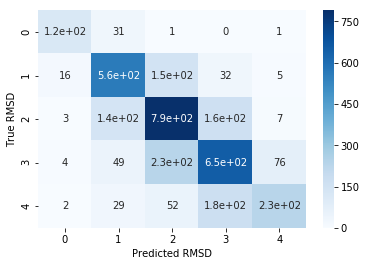

In [23]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,cmap='Blues',annot=True)
plt.xlabel('Predicted RMSD')
plt.ylabel('True RMSD')

The confusion matrix showed our prediction were more accurate in low RMSD than in high RMSD.

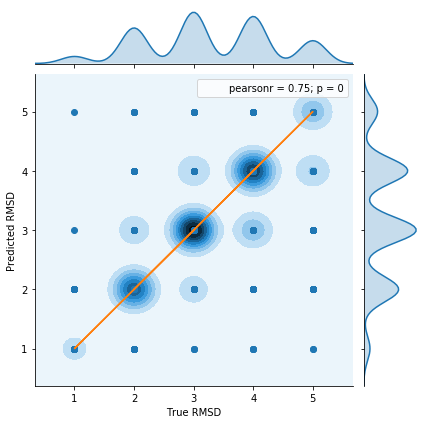

In [32]:
g= sns.jointplot(y_test,y_pred,kind='kde')
g.plot_joint(plt.scatter)
g.ax_joint.set_xlabel('True RMSD')
g.ax_joint.set_ylabel('Predicted RMSD')
plt.plot(y_test,y_test)

## Discussion and Conclusion

Compared to the three other models Neural Network, Linear Model Classification, and K Nearest Neighbor Classification, the Random Forest predicted the most accurate class of RMSD. Randomforest was overfitting because the score of train set was significantly higher than the test set. 

GridSearch was conducted to tune the same parameter ('mtry' in R) as the article. Several parameters have been tested but the best fit values were similar to the default set. The accuracy was improve a little bit (0.01) but still became overfitting. Tunning the 'min_samples_split' helps reduce overfitting.

The K-fold showed that different sets of the data were consistent with the eventual score. Moreover, my k-fold also worked because the computed scores were close to these of the default k-fold. 


## Acknowledge:
I thank Dr. Weiss, Wabash Chemistry Department for supervising the computing codes and advising on model selections.

I thank Dr. Novak, Wabash Chemistry Department for helpful discussions.

## References

1. Pathak, Yadunath & Singh, Prashant & Singh, Pramod & Saraswat, Mukesh. (2015). Protein structure prediction (RMSD $\leq$ 5 Å) using machine learning models. International Journal of Data Mining and Bioinformatics. 14.

2. Aditya, Mittal & B. Jayaram. (2012) Backbones of Folded Proteins Reveal Novel Invariant Amino Acid Neighborhoods, Journal of Biomolecular Structure and Dynamics, 28:4, 443-454, DOI: 10.1080/073911011010524954 